In [17]:
import pandas as pd
import ccxt
import time
from timeit import default_timer as timer
from matplotlib import pyplot
from decimal import Decimal as D
import numpy as np

In [2]:
this_exchange = ccxt.poloniex()

In [ ]:
if False:
    for i in POLO.__dict__:
        if '__' not in i:
            if 'fetch' in i:
                print(i)

In [3]:
ticker = this_exchange.fetchTickers()

In [7]:
coins_not_working = ['LTC/BTC', 'STR/BTC']
coins_to_use = ['ETH/BTC', 'XRP/BTC', 'DASH/BTC' , 'XMR/BTC',
                'BTS/BTC', 'DOGE/BTC', 'FCT/BTC', 'MAID/BTC', 'CLAM/BTC']
coins_collected = []
datasets = []
min_len = 10000000
start_data_gen = timer()
for index, pair in enumerate(ticker):
    if pair in coins_to_use:
        if pair not in coins_collected:
            print(pair)
            # SLEEP!! DO NOT GET BANNED!
            time.sleep (this_exchange.rateLimit / 400)
            start_call = timer()
            chart = this_exchange.fetchOhlcv(pair, 
                                             timeframe = '5m', # polo only offers the 5m
                                             since = int(1515974400)
                                             )
            df = pd.DataFrame(
                chart, 
                columns=['time','open','high','low','close','vol']
            )
            df.pair = pair
            this_len = len(df)
            if this_len < min_len:
                min_len = this_len
            print('Elements in Dataset:', this_len)
            print('Downloading this coin took: {:.2f} secs'.format(timer()-start_call))
            datasets.append(df)
            coins_collected.append(pair)
print('Min length of all sets is {} samples'.format(min_len))
print('Collected All Datasets. Took {:.2f} mins'.format(timer()-start_data_gen/60))        

BTS/BTC
Elements in Dataset: 364053
CLAM/BTC
Elements in Dataset: 376135
DASH/BTC
Elements in Dataset: 418548
DOGE/BTC
Elements in Dataset: 423417
MAID/BTC
Elements in Dataset: 374823
XMR/BTC
Elements in Dataset: 389642
XRP/BTC
Elements in Dataset: 364605
ETH/BTC
Elements in Dataset: 261198
FCT/BTC
Elements in Dataset: 244556
Min length of all sets is 244556 samples
Collected All Datasets. Took 151.53 mins


In [8]:
# the end time in all datasets is the same... so take the min_len to the end
new_datasets = []
for d in datasets:
    pair = d.pair
    this_len = len(d)
    print(pair, this_len)
    if this_len == min_len:
        print('this is the lowest len df and not changing')
        time_of_start = d['time'][0]
        time_of_end = d['time'][len(d['time'])-1]
        new_datasets.append(d) 
    elif this_len > min_len:
        trim_section_start = len(d['time']) - min_len
        time_of_start = d['time'][trim_section_start]
        time_of_end = d['time'][len(d['time'])-1]
        df = d[trim_section_start:]
        df.pair = pair
        new_datasets.append(df)    
    print('Start of set {}'.format(time_of_start))
    print('end of set {}'.format(time_of_end))
    print('New set len {}'.format(len(df)))
    

BTS/BTC 364053
Start of set 1444003200000
end of set 1517369700000
New set len 244556
CLAM/BTC 376135
Start of set 1444003200000
end of set 1517369700000
New set len 244556
DASH/BTC 418548
Start of set 1444003200000
end of set 1517369700000
New set len 244556
DOGE/BTC 423417
Start of set 1444003200000
end of set 1517369700000
New set len 244556
MAID/BTC 374823
Start of set 1444002900000
end of set 1517369400000
New set len 244556
XMR/BTC 389642
Start of set 1444003200000
end of set 1517369700000
New set len 244556
XRP/BTC 364605
Start of set 1444003200000
end of set 1517369700000
New set len 244556
ETH/BTC 261198
Start of set 1444003200000
end of set 1517369700000
New set len 244556
FCT/BTC 244556
this is the lowest len df and not changing
Start of set 1444003200000
end of set 1517369700000
New set len 244556


In [9]:
for set_ in new_datasets:
    print(set_.pair, len(set_))

BTS/BTC 244556
CLAM/BTC 244556
DASH/BTC 244556
DOGE/BTC 244556
MAID/BTC 244556
XMR/BTC 244556
XRP/BTC 244556
ETH/BTC 244556
FCT/BTC 244556


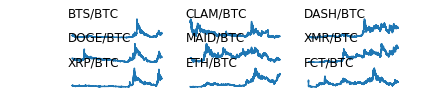

In [10]:
pyplot.figure()
i = 1
for set_ in new_datasets:
    pyplot.subplot(len(new_datasets), 3, i)
    pyplot.plot(set_['close'])
    pyplot.axis('off')
    pyplot.title(set_.pair, y=.75, loc='left')
    i += 1
pyplot.show()

In [ ]:
# WHAT DO I WANT FOR COLUMNS!?!?!?!?!
# Each input will have 20 values
# input1 = [[last][vol][last -60 elements]]
# input2 = [[low][high][mean*]]
# input3 = [[bollinger high][bollinger low][mean**]]
# ###
# input4 = [[twitter sent][twittervol]]
# ###
# output1 = [time, time+1, time+2] # doesnt matter what the input all the outputs will be the same and averaged over

In [13]:
for set_ in new_datasets:
    print(set_.pair)

BTS/BTC
CLAM/BTC
DASH/BTC
DOGE/BTC
MAID/BTC
XMR/BTC
XRP/BTC
ETH/BTC
FCT/BTC


In [15]:
cols = []
for i in range(60):
    cols.append('close_{}'.format(i))
    cols.append('vol_{}'.format(i))
print(cols)

['close_0', 'vol_0', 'close_1', 'vol_1', 'close_2', 'vol_2', 'close_3', 'vol_3', 'close_4', 'vol_4', 'close_5', 'vol_5', 'close_6', 'vol_6', 'close_7', 'vol_7', 'close_8', 'vol_8', 'close_9', 'vol_9', 'close_10', 'vol_10', 'close_11', 'vol_11', 'close_12', 'vol_12', 'close_13', 'vol_13', 'close_14', 'vol_14', 'close_15', 'vol_15', 'close_16', 'vol_16', 'close_17', 'vol_17', 'close_18', 'vol_18', 'close_19', 'vol_19', 'close_20', 'vol_20', 'close_21', 'vol_21', 'close_22', 'vol_22', 'close_23', 'vol_23', 'close_24', 'vol_24', 'close_25', 'vol_25', 'close_26', 'vol_26', 'close_27', 'vol_27', 'close_28', 'vol_28', 'close_29', 'vol_29', 'close_30', 'vol_30', 'close_31', 'vol_31', 'close_32', 'vol_32', 'close_33', 'vol_33', 'close_34', 'vol_34', 'close_35', 'vol_35', 'close_36', 'vol_36', 'close_37', 'vol_37', 'close_38', 'vol_38', 'close_39', 'vol_39', 'close_40', 'vol_40', 'close_41', 'vol_41', 'close_42', 'vol_42', 'close_43', 'vol_43', 'close_44', 'vol_44', 'close_45', 'vol_45', 'close_

In [ ]:
working_df = pd.DataFrame(columns=cols)

In [19]:
# input1 = [[last][vol][1]]
dataset = np.zeros((60, 60, len(new_datasets)))
for index1, set_ in enumerate(new_datasets):
    for index2 in range(len(set_)):
        if index2 <= len(set_) - 60:
            dataline = []
            for i in range(60):
                close = set_.loc[i + index2]['close']
                vol = set_.loc[i + index2]['vol']
            dataset[:,index2] = [close, vol, index1]              


TypeError: data type not understood

In [ ]:
df = new_datasets[2]

In [ ]:
print(df.columns)

In [ ]:
close = pd.Series(df['close'])

In [ ]:
raw_values = close.values
print(raw_values)

In [ ]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        # print(i - interval)
        value = D(dataset[i]) - D(dataset[i - interval])
        diff.append(value)
    return pd.Series(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[interval-1]

def undiff(dataset, diff, interval=1):
    the_return = list()
    for i, e in enumerate(diff):
        if i >= interval:
            last_val = dataset[i-interval]
            next_val = D(last_val) + D(diff[i])
            # assert next_val == dataset[i]
            the_return.append(next_val)
    return pd.Series(the_return)

In [ ]:
diff_series = difference(close, 1)

In [ ]:
fixed_series = undiff(close, diff_series, 1)

In [ ]:
print(fixed_series.head())

In [ ]:
inverted = list()
for i in range(len(diff_series)):
    value = inverse_difference(close, diff_series[i], len(diff_series)-i)
    inverted.append(value)
inverted = pd.Series(inverted)

In [ ]:
print(close.head())
print(diff_series.head())
print(inverted.head())